# Project: Investigate a Dataset (Database_TMDb_movie_data!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The Movie Database abbreviated as TMDB dataset contains 10866 rows and 21 columns, the columns includes
id, imdb_id, popularity, budget, revenue, original_title, cast,  homepage, director, tagline, keywords, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, revenue_adj. In this project, we are going to explore the data, perform data cleaning, Compute statistics and create visualizations 
### Research Question
  1. Which director have directed the highest number of movies
  2. Which actors have the highest number of movies
  3. What is the average budget for movies over the years
  4. What is the average interest the film industry has made over the years

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import operator
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

### General Properties
> Loading the dataset 

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df_movies = pd.read_csv('tmdb-movies.csv')

>Print few rows from the dataset

In [3]:
# print out a few lines
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> Print the dimension of the data

In [4]:
# print the dimension of the rows and columns
df_movies.shape

(10866, 21)

> Print a comprehensive summary of the dataframe with their corresponding data values and datatype.

In [5]:
# Print the data columns: Name, Values and Datatype
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

> Provide a descriptive statistics of the dataset

In [6]:
# Get a descriptive Statistics of our data
df_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> Check for duplicated values from the data

In [7]:
# Get duplicates from the data
df_movies.duplicated().sum()

1

> Check for all Null Values from the data

In [8]:
# Get all Null Values from the data
df_movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Data Cleaning
>In this section, we are going to get rid of unneccessary data from the dataset, remove duplicate values, remove null values, convert release_date from str to datetime, delete unneccessary columns, remove rows with zero budget and revenue

> Drop duplicate data

In [9]:
# delete duplicated data
df_movies.drop_duplicates(inplace = True)

In [10]:
# confirm if dublicated rows are removed
df_movies.shape 

(10865, 21)

>Drop null values

In [11]:
# Droping the null
df_movies.dropna(inplace=True)

In [12]:
# confirm if null values are removed
df_movies.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [13]:
# Convert 'release_date' type from str to datetime 
df_movies["release_date"] = df_movies['release_date'].astype('datetime64[ns]')

In [14]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 10819
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    1992 non-null   int64         
 1   imdb_id               1992 non-null   object        
 2   popularity            1992 non-null   float64       
 3   budget                1992 non-null   int64         
 4   revenue               1992 non-null   int64         
 5   original_title        1992 non-null   object        
 6   cast                  1992 non-null   object        
 7   homepage              1992 non-null   object        
 8   director              1992 non-null   object        
 9   tagline               1992 non-null   object        
 10  keywords              1992 non-null   object        
 11  overview              1992 non-null   object        
 12  runtime               1992 non-null   int64         
 13  genres           

> Get rid of unnecessary columns

In [15]:
# Delete uneccessary colums
df_movies.drop(['id', 'imdb_id', 'homepage',  'tagline', 'keywords', 'overview', 'production_companies', 'budget_adj', 'revenue_adj'], inplace=True, axis=1)

In [16]:
# confirm removal of uneccessary colums
df_movies.head(103)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
181,0.821443,0,0,LEGO DC Comics Super Heroes: Justice League vs...,Nolan North|Troy Baker|Diedrich Bader|Khary Pa...,Brandon Vietti,48,Action|Adventure|Animation|Family,2015-02-10,14,6.4,2015
187,0.792471,0,0,Into the Forest,Ellen Page|Evan Rachel Wood|Max Minghella|Call...,Patricia Rozema,101,Drama|Science Fiction,2015-06-03,57,5.1,2015
195,0.738404,0,8413144,Amy,Amy Winehouse|Mark Ronson|Tony Bennett|Pete Do...,Asif Kapadia,128,Documentary|Music,2015-07-03,345,7.5,2015
197,0.719407,0,0,The Hallow,Joseph Mawle|Bojana NovakoviÄ‡|Michael McElhat...,Corin Hardy,97,Fantasy|Horror,2015-11-06,122,4.9,2015


>From the above result, we can see that there are a lot of rows with zero budget and revenue, this might affect our analysis.

>lets get rid of the rows with zero values

In [17]:
# Remove rows with zero budget
zero_budget = df_movies[df_movies.budget == 0]
df_movies.drop(zero_budget.index, inplace=True)

In [18]:
# Remove rows with zero revenue
zero_revenue = df_movies[df_movies.revenue == 0]
df_movies.drop(zero_revenue.index, inplace=True)

In [19]:
# confirm removal of zero budget and revenue
df_movies.head(103)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
634,10.174599,250000000,955119788,The Hobbit: The Battle of the Five Armies,Martin Freeman|Ian McKellen|Richard Armitage|K...,Peter Jackson,144,Adventure|Fantasy,2014-12-10,3110,7.1,2014
635,8.691294,165000000,652105443,Big Hero 6,Scott Adsit|Ryan Potter|Daniel Henney|T.J. Mil...,Don Hall|Chris Williams,102,Adventure|Family|Animation|Action|Comedy,2014-10-24,4185,7.8,2014
636,8.110711,14000000,233555708,The Imitation Game,Benedict Cumberbatch|Keira Knightley|Matthew G...,Morten Tyldum,113,History|Drama|Thriller|War,2014-11-14,3478,8.0,2014
637,7.137273,34000000,348319861,The Maze Runner,Dylan O'Brien|Ki Hong Lee|Kaya Scodelario|Aml ...,Wes Ball,113,Action|Mystery|Science Fiction|Thriller,2014-09-10,3425,7.0,2014


In [20]:
# Get the new dimensions of our data
df_movies.shape

(1287, 12)

In [21]:
# Get the statistics of our latest data
df_movies.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,1287.000000,1.287000e+03,1.287000e+03,1287.000000,1287.000000,1287.000000,1287.000000
mean,1.786022,5.200349e+07,1.762444e+08,110.273504,947.266511,6.279487,2007.017094
std,2.172137,5.514540e+07,2.538156e+08,18.811369,1255.476215,0.795955,8.060503
min,0.010335,1.000000e+00,4.300000e+01,63.000000,10.000000,2.200000,1961.000000
25%,0.664783,1.400000e+07,2.565097e+07,97.000000,179.000000,5.800000,2005.000000
50%,1.152354,3.200000e+07,8.208716e+07,107.000000,439.000000,6.300000,2009.000000
75%,2.125342,7.000000e+07,2.140694e+08,121.000000,1173.000000,6.800000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,201.000000,9767.000000,8.300000,2015.000000


<a id='eda'></a>
## Exploratory Data Analysis

> Visualization of our dataset

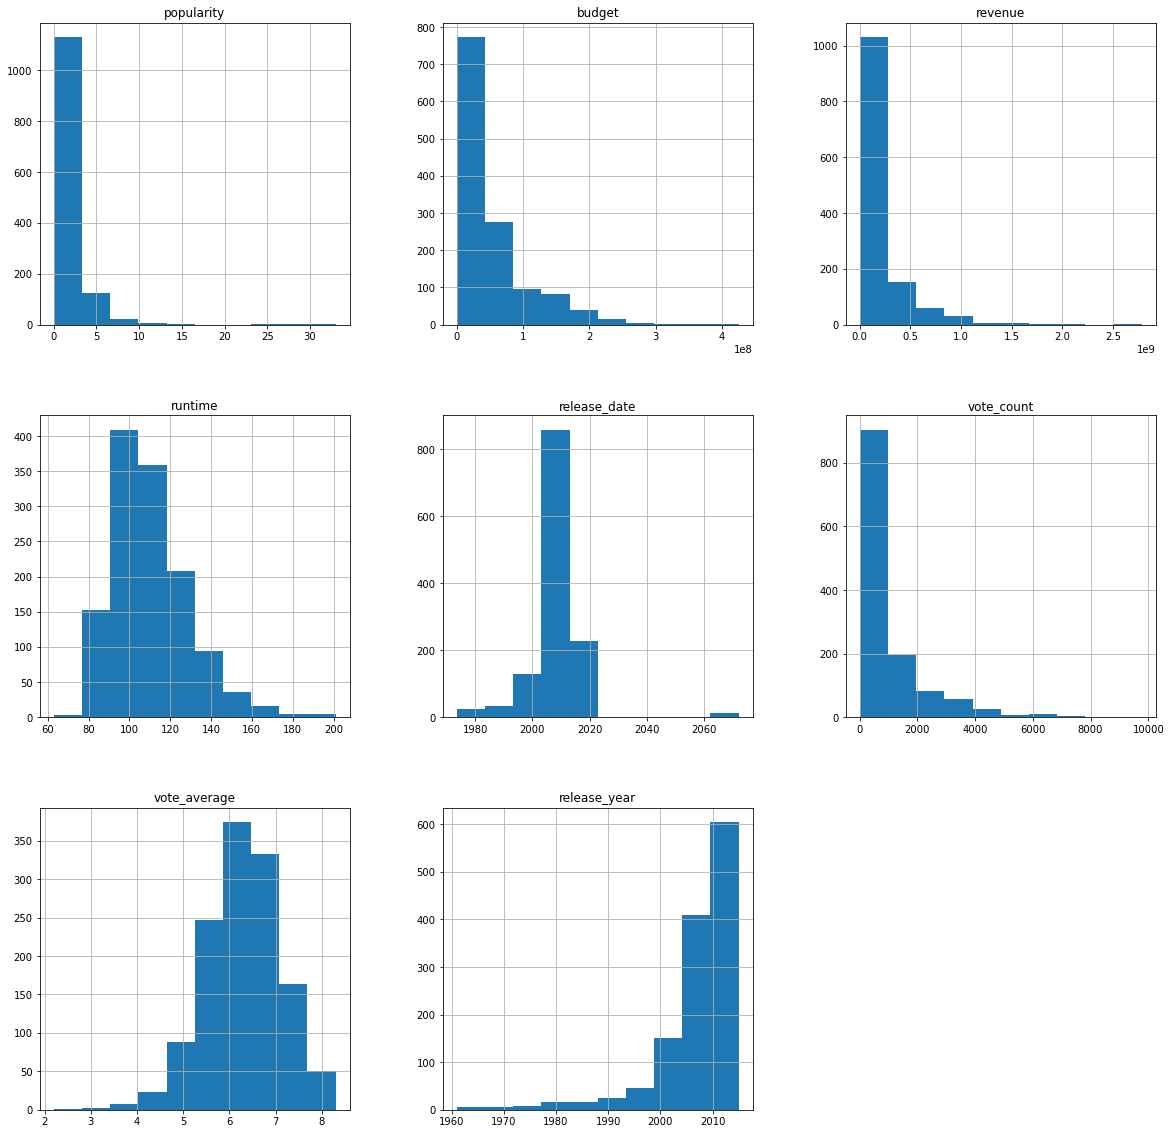

In [22]:
df_movies.hist(figsize=(20,20));

### Research Question 1: Which director have directed the highest number of movies
>From the directors column, we can get the directors with the highest number of movies using **value_counts()** function

In [23]:
# Get the number of movies for each director
count_movies_director = df_movies['director'].value_counts()
# Get the top 20 directors with the highest number of movies
count_movies_director = count_movies_director.head(20)
# Print top 20 directors
count_movies_director

John Carpenter          12
Steven Spielberg        11
Steven Soderbergh       10
Robert Zemeckis          8
Clint Eastwood           8
Ridley Scott             8
Peter Jackson            8
Ron Howard               7
Christopher Nolan        7
Paul W.S. Anderson       7
David Fincher            7
Michael Bay              6
Francis Lawrence         6
Kevin Smith              5
F. Gary Gray             5
Martin Scorsese          5
Gore Verbinski           5
Zack Snyder              5
Brian Robbins            5
Francis Ford Coppola     5
Name: director, dtype: int64

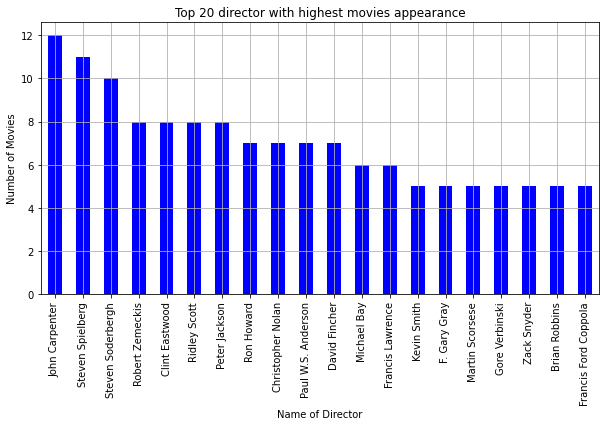

In [24]:
# Bar plot of top 20 director with highest movies appearance
count_movies_director.plot(kind='bar',color='blue', animated=True, title='Top 20 director with highest movies appearance',figsize = (10,5), grid=True)
# x-axis variable name
plt.xlabel('Name of Director')
# y-axis variable
plt.ylabel('Number of Movies');

>The director with the highest number of movies is John Carpenter with 12 movies while the last top 20th director is Francis Ford Coppola with 5 movies

### Research Question 2: Which actors have the highest number of movies
>From the cast column, we can observe that some rows have one, two or more cast separated by |, we need to split all the cast using the **split()** function and get the actor with the highest number of movies appearances with **value_counts()**

In [25]:
# define a function for barplot to help with our charts
def barplot(column, title=None, xlabel=None, ylabel=None, figsize=(20,10), color='blue'):
    #define the stylesheet
    sns.set_style('darkgrid')

    # plot the data on a bar chart

    column.plot(kind='bar', figsize=figsize, color=color);
    plt.title(title, fontsize = 14);
    plt.xlabel(xlabel, fontsize = 12)
    plt.ylabel(ylabel, fontsize = 12);
    plt.yticks(fontsize = 11)
    plt.show()
    

In [26]:
# Get all the cast with '|' from the dataset
count_movies_cast = df_movies['cast'].str.cat(sep='|')
# Trim whitespace
count_movies_cast = count_movies_cast.lstrip() 
# Split the cast using split()
count_movies_cast = pd.Series(count_movies_cast.split('|'))

# get the number of occurance for each cast
count_movies_cast = count_movies_cast.value_counts().head(10)
# print to 10 cast
count_movies_cast.head(10)

Matt Damon           22
Mark Wahlberg        19
Samuel L. Jackson    17
Anne Hathaway        16
Brad Pitt            16
Robert Downey Jr.    15
George Clooney       15
Jason Statham        15
Jennifer Aniston     14
Harrison Ford        14
dtype: int64

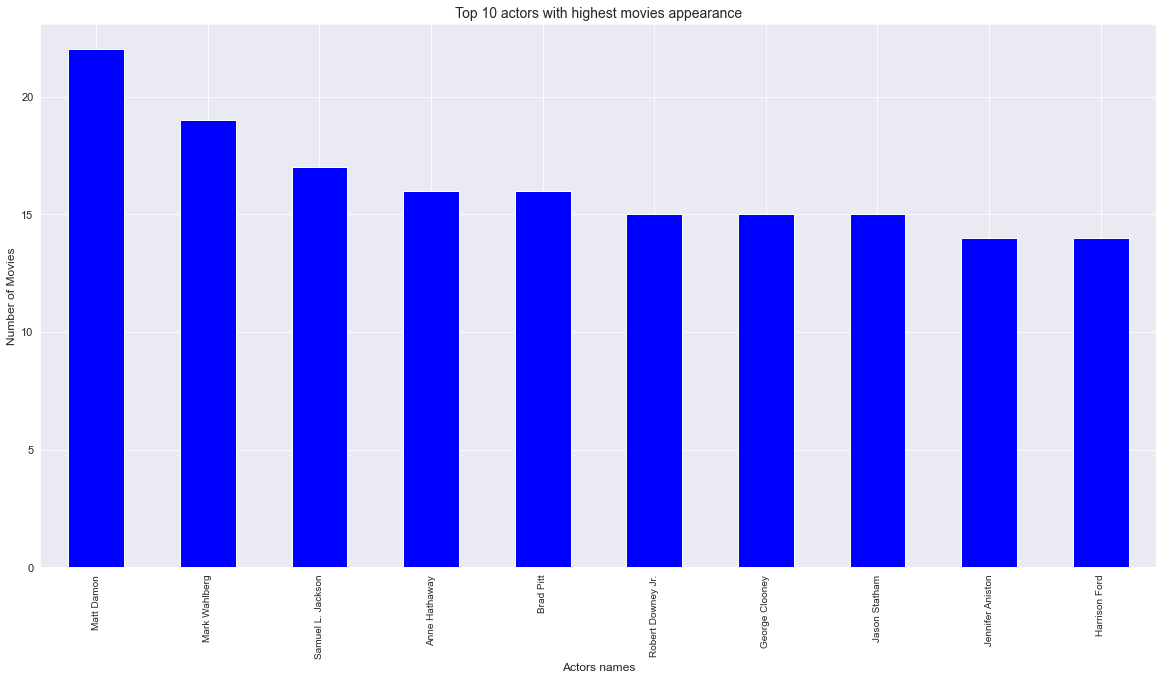

In [27]:
# barplot for top 10 actors with highest number of movies
barplot(count_movies_cast, 'Top 10 actors with highest movies appearance' , 'Actors names', 'Number of Movies')

> The actor with the highest number of movies is Matt Damon with 22 movies

### Research Question 3: What is the average budget for movies over the years
>Examining the budget over the years can make us predict if the average budget of movies is either increasing or decreasing

In [28]:
# Get the average budget of movies over the years
avg_budget_in_year = df_movies.groupby('release_year')['budget'].mean()
avg_budget_in_year

release_year
1961    3.000000e+06
1962    1.100000e+06
1963    2.500000e+06
1964    2.000000e+06
1965    1.100000e+07
1967    9.500000e+06
1969    7.000000e+06
1971    3.319250e+06
1972    6.000000e+06
1973    7.500000e+06
1974    7.000000e+06
1975    2.866667e+06
1977    1.250000e+07
1978    1.500000e+06
1979    1.920000e+07
1980    9.500000e+06
1981    1.358333e+07
1982    1.616667e+07
1983    2.357000e+07
1984    2.160000e+07
1985    2.450000e+07
1986    2.500000e+07
1987    1.792500e+07
1988    3.500000e+06
1989    3.250000e+07
1990    2.800001e+07
1991    2.400000e+07
1992    3.214111e+07
1993    3.214286e+07
1994    1.420540e+07
1995    2.388750e+07
1996    4.419231e+07
1997    6.840625e+07
1998    4.812818e+07
1999    5.109205e+07
2000    5.564286e+07
2001    5.777778e+07
2002    5.785418e+07
2003    4.778540e+07
2004    5.688853e+07
2005    4.659755e+07
2006    4.813881e+07
2007    5.098016e+07
2008    4.998293e+07
2009    5.070989e+07
2010    5.186186e+07
2011    4.833013e+07


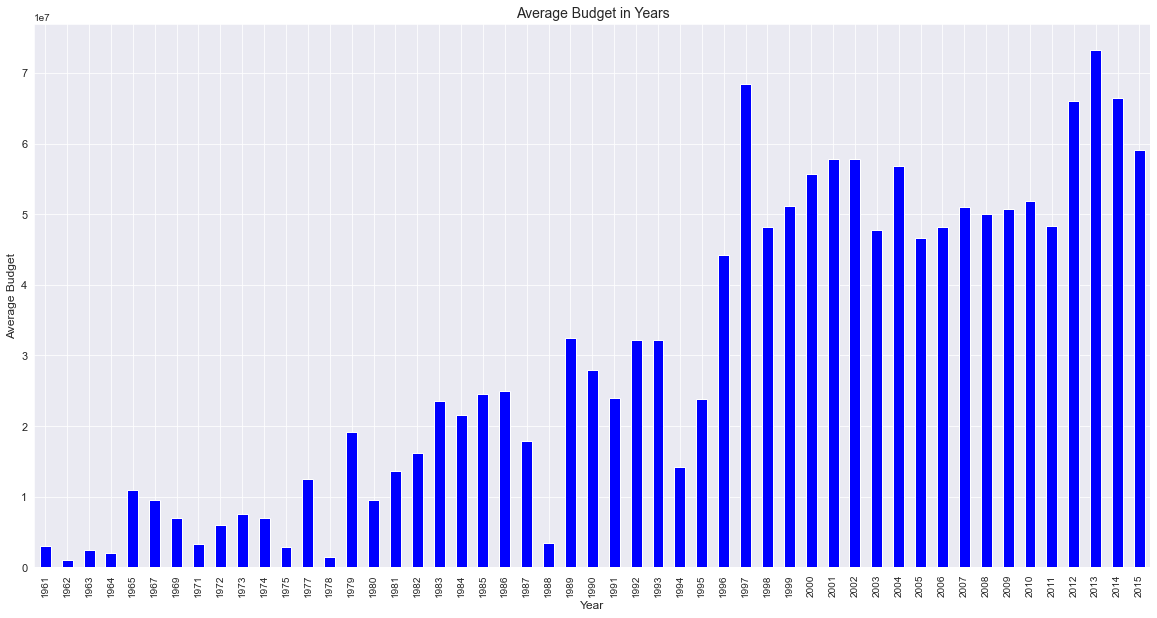

In [29]:
# barplot for average budget of movies over the years
barplot(avg_budget_in_year, 'Average Budget in Years', 'Year' , 'Average Budget')

> the average budget have a positive corrolation. This shows that the budget keep increasing over the years

### Research Question 4: What is the average interest the film industry has made over the years
>We can calculate that by creating a new column using **assign()** function to hold the difference between the budget and revenue columns

In [30]:
# get the profit from revenue and budget
profit = df_movies["revenue"] - df_movies["budget"]
# Create an interest column in the data 
profit = df_movies.insert(3,"interest",profit)
# print the the budget and revenue and the newly created interest column
print(df_movies[['budget', 'revenue', 'interest']])

          budget     revenue    interest
0      150000000  1513528810  1363528810
1      150000000   378436354   228436354
2      110000000   295238201   185238201
3      200000000  2068178225  1868178225
4      190000000  1506249360  1316249360
...          ...         ...         ...
10595    7000000   161777836   154777836
10689   11000000   141195658   130195658
10724    7000000    81974493    74974493
10759     300000    70000000    69700000
10760    2700000   141000000   138300000

[1287 rows x 3 columns]


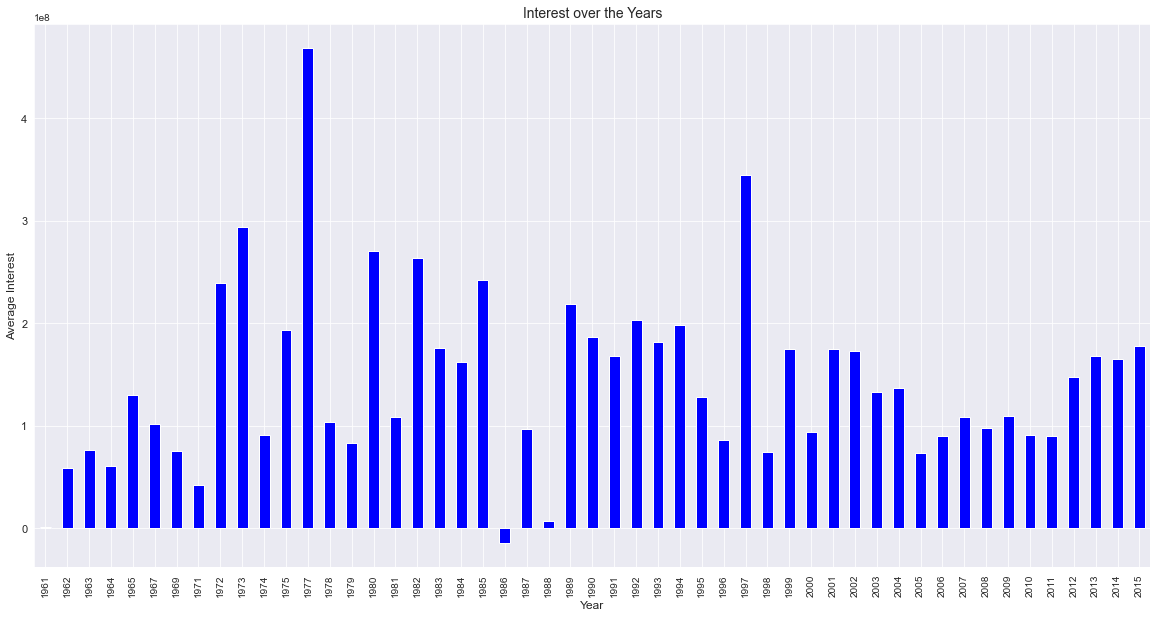

In [31]:
# Get the average profit 
profit = df_movies.groupby('release_year')['interest'].mean()
# barplot for Interest in movies over the years
barplot(profit, 'Interest over the Years', 'Year' , 'Average Interest')

> from the chart above, the year with highest average interest is 1977 and the year with lowest average interest is 1986

<a id='conclusions'></a>
## Conclusions
>**Result** From our data we can deduce that: 
>- The movie industry keep having increase in budget over the years which implies that it is growing fast
>- In recent years, the higher the budget, the higher  the interest
>- the number of movies released each year keep increasing over years.
>- The actor with the highest number of movies is Matt Damon with 22 movies
>- the average budget has a positive corrolation i.e it is increasing over the years
>- the year with highest average interest is 1977 and the year with lowest average interest is 1986

>**Limitations:** Some of the limitations dataset are. 
> - The dataset contain duplicate values, null values and wrong datatype, dropping these values can affect our analysis as they might contain information that will be helpful for our analysis.
> - There is a lot of rows with zero values in the budget and revenue rows and dropping them have affected many rows which lead to decrease in the accuracy of my analysis when analysing the profit made by the movie industry. this have also affected my analysis for calculating the average budget for movies over the years.
> - During my analysis on directors and cast with highest number of movies (which might be a key determining movie rating), I found out that there are many missing values on the 'director' and 'cast' rows. In the data cleaning process, I remove all the missing values and consequently, it affected the outcome of my analysis.
 >- Currency unit for budget and revenue column were not specified which make it difficult to determine which currency the movies budget and revenue is generated from.  